In [51]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Load Data

In [88]:
df = pd.read_csv('AirQuality.csv')
Z = df["Site ID"]

Remove unnecessary data (columns of strings, label column, reformat dates, etc.)

In [89]:
df.drop(["Site ID", "County", "Outlier"], axis=1, inplace=True)

Reformat dates for use in clustering

**WARNING** This cell takes a minute to run.

In [90]:
# Get a list of dates
dates = df['Date'].unique()

# Sort the dates in order
dates.sort()

# Replace each date with an index (1-len(dates))
for i in range(1, len(dates)+1):
  df['Date'].replace(dates[i-1], i, inplace=True)

# Make values numeric
df['Date'] = pd.to_numeric(df['Date'])

Separate train and test set

In [69]:
df.columns

Index(['Date', 'County FIPS Code', 'Site Latitude', 'Site Longitude',
       'Daily Max 8-hour CO Concentration', 'Daily AQI Value CO',
       'Daily Obs Count CO', 'Daily Max 1-hour NO2 Concentration',
       'Daily AQI Value NO2', 'Daily Obs Count NO2',
       'Daily Max 8-hour Ozone Concentration', 'Daily AQI Value Ozone',
       'Daily Obs Count Ozone', 'Daily Mean PM2.5 Concentration',
       'Daily AQI Value PM2.5', 'Daily Obs Count PM2.5',
       'Daily Mean PM10 Concentration', 'Daily AQI Value PM10',
       'Daily Obs Count PM10', 'Daily Max 1-hour SO2 Concentration',
       'Daily AQI Value SO2', 'Daily Obs Count SO2', 'Weekend'],
      dtype='object')

In [91]:
X_train, X_test = train_test_split(df, test_size=0.2)
Y_train, Y_test = X_train.copy(), X_test.copy()
X_train.drop(["Date", "Site Latitude", "Site Longitude", "County FIPS Code", "Weekend"], axis=1, inplace=True)
X_test.drop(["Date", "Site Latitude", "Site Longitude", "County FIPS Code", "Weekend"], axis=1, inplace=True)

Kmeans

In [98]:
kmeans = KMeans(3).fit(X_train)
labels = kmeans.predict(X_train)
test_labels = kmeans.predict(X_test)

Index(['Daily Max 8-hour CO Concentration', 'Daily AQI Value CO',
       'Daily Obs Count CO', 'Daily Max 1-hour NO2 Concentration',
       'Daily AQI Value NO2', 'Daily Obs Count NO2',
       'Daily Max 8-hour Ozone Concentration', 'Daily AQI Value Ozone',
       'Daily Obs Count Ozone', 'Daily Mean PM2.5 Concentration',
       'Daily AQI Value PM2.5', 'Daily Obs Count PM2.5',
       'Daily Mean PM10 Concentration', 'Daily AQI Value PM10',
       'Daily Obs Count PM10', 'Daily Max 1-hour SO2 Concentration',
       'Daily AQI Value SO2', 'Daily Obs Count SO2'],
      dtype='object')


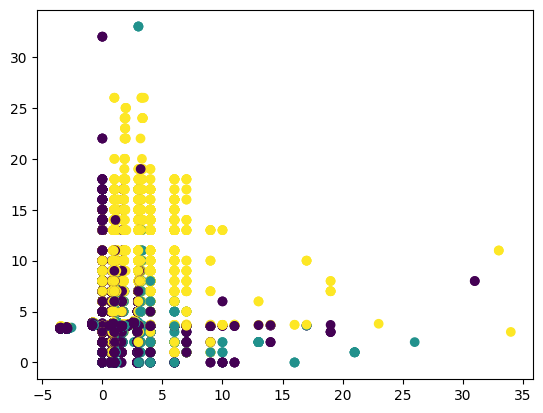

In [100]:
print(X_train.columns)
plt.scatter(X_train.iloc[:, -2], X_train.iloc[:,1], c=labels)
plt.scatter(X_test.iloc[:, -2], X_test.iloc[:,1], c=test_labels)
#plt.legend(['train', 'test'])
plt.show()